<a href="https://colab.research.google.com/github/rocket0l4/ML-files/blob/main/Random_Forest_with_column_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the dataset by use of make_classification

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [16]:
X,y = make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

#Giving the name to the columns and making Target column.

In [17]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.194980,2.016892,3.674790,2.958299,1.246226,1
1,-1.945404,1.166619,-0.011770,2.476210,0.950365,1
2,-1.242707,-1.425648,3.512440,0.964788,1.189123,0
3,-1.267330,0.607604,0.532057,2.329505,0.810500,1
4,-1.055689,0.592511,0.941612,1.477473,-0.036433,1


#Creating a function for column sampleing...
# Here the no. of rows remain always same but the shuffeling occures in the column, as we clearly see every time we create the dataset it gets new values and also here the creating of dataset/subset without replacement....

- Pick-uping the column randomly and creating the new_df(new dataset or subset).
- Pick-uping the every column include target column also...
- One main point changing occures in dataset, that's why it shows the warning...

In [38]:
def sample_feature(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df =  df[cols]
  new_df['target'] = df['target']
  return new_df

In [39]:
df1 = sample_feature(df,0.8)
df1.shape

<ipython-input-38-fdb01316d0b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


(100, 5)

In [54]:
sample_feature(df,0.8)

<ipython-input-38-fdb01316d0b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col4,col3,col1,col5,target
0,2.958299,3.674790,0.194980,1.246226,1
1,2.476210,-0.011770,-1.945404,0.950365,1
2,0.964788,3.512440,-1.242707,1.189123,0
3,2.329505,0.532057,-1.267330,0.810500,1
4,1.477473,0.941612,-1.055689,-0.036433,1
...,...,...,...,...,...
95,1.358383,4.086111,0.613192,1.445349,1
96,2.828471,0.059892,0.310912,1.264958,0
97,1.100207,4.221930,-2.053079,1.153858,0
98,0.194872,1.207930,-2.248197,0.301442,0


In [40]:
df2 = sample_feature(df,0.8)
df2.shape

<ipython-input-38-fdb01316d0b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


(100, 5)

In [41]:
df3 = sample_feature(df,0.8)
df3.shape

<ipython-input-38-fdb01316d0b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


(100, 5)

##here we can clearly see how many column are present in the each datsets/subsets..

In [55]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col1', 'col4', 'col5', 'target'], dtype='object')
Index(['col4', 'col5', 'col2', 'col3', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'target'], dtype='object')


In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [46]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

In [47]:
from sklearn.tree import plot_tree

[Text(0.6346153846153846, 0.9166666666666666, 'x[0] <= 0.33\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.4230769230769231, 0.75, 'x[0] <= -1.021\ngini = 0.375\nsamples = 64\nvalue = [48, 16]'),
 Text(0.5288461538461539, 0.8333333333333333, 'True  '),
 Text(0.23076923076923078, 0.5833333333333334, 'x[3] <= -0.54\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[1] <= -2.179\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3076923076923077, 0.4166666666666667, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.6153846153846154, 0.5833333333333334, 'x[1] <= -0.558\ngini = 0.498\nsamples = 32\nvalue = [17, 15]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[2] <= 0.173\ngini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(0.38461538461538464, 0.25, 'x[3] <= -0.199\ngi

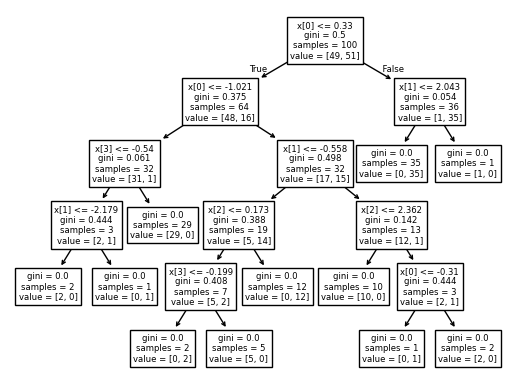

In [48]:
plot_tree(clf1)

[Text(0.5583333333333333, 0.9285714285714286, 'x[2] <= 0.33\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.31666666666666665, 0.7857142857142857, 'x[2] <= -1.021\ngini = 0.375\nsamples = 64\nvalue = [48, 16]'),
 Text(0.4375, 0.8571428571428572, 'True  '),
 Text(0.13333333333333333, 0.6428571428571429, 'x[3] <= -1.544\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.06666666666666667, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.5, 0.6428571428571429, 'x[1] <= 0.636\ngini = 0.498\nsamples = 32\nvalue = [17, 15]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= -0.471\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.26666666666666666, 0.35714285714285715, 'x[1] <= -0.426\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4, 0.3571428

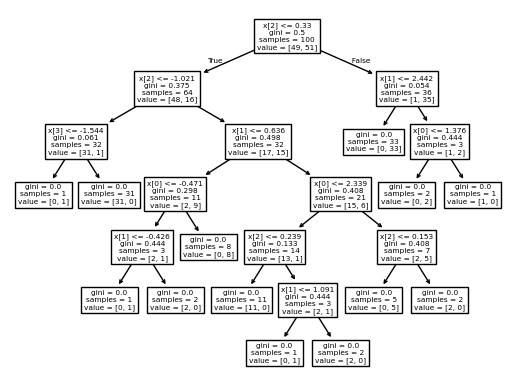

In [49]:
plot_tree(clf2)

[Text(0.6041666666666666, 0.9285714285714286, 'x[1] <= 0.33\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.375, 0.7857142857142857, 'x[1] <= -1.021\ngini = 0.375\nsamples = 64\nvalue = [48, 16]'),
 Text(0.4895833333333333, 0.8571428571428572, 'True  '),
 Text(0.16666666666666666, 0.6428571428571429, 'x[2] <= -1.544\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.5833333333333334, 0.6428571428571429, 'x[0] <= -0.558\ngini = 0.498\nsamples = 32\nvalue = [17, 15]'),
 Text(0.4166666666666667, 0.5, 'x[3] <= 0.173\ngini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[0] <= -1.134\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.4166666666666667, 0.21428571428571427, 'x[0] <= -0.697\ngini = 0.444\nsamples = 3\nvalue

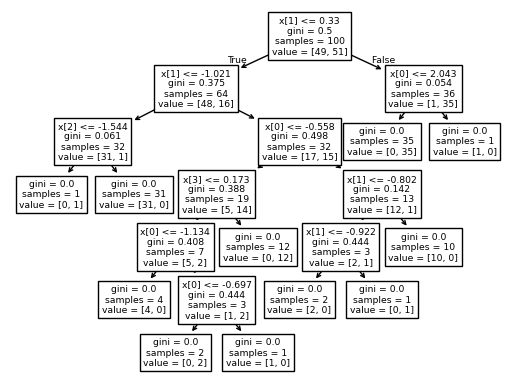

In [50]:
plot_tree(clf3)